# Load

In [1]:
using Plots
using NBInclude
using LaTeXStrings
#using IterTools
using Printf
#using IterTools
using GLM
using Statistics
using InvertedIndices
using BenchmarkTools
using Pipe

In [2]:
t=time()

1.73202059123e9

In [3]:
@nbinclude("../L5/List5.ipynb");

┌ Warning: Assignment to `inter` in soft scope is ambiguous because a global variable by the same name exists: `inter` will be treated as a new local. Disambiguate by using `local inter` to suppress this warning or `global inter` to assign to the existing global variable.
└ @ C:\Git\Numeryczne-Teoretyczne\L5\List5.ipynb:In[199]:3
[ Info: Saved animation to C:\Git\Numeryczne-Teoretyczne\L6\tmp.gif
┌ Warning: Assignment to `inter` in soft scope is ambiguous because a global variable by the same name exists: `inter` will be treated as a new local. Disambiguate by using `local inter` to suppress this warning or `global inter` to assign to the existing global variable.
└ @ C:\Git\Numeryczne-Teoretyczne\L5\List5.ipynb:In[203]:3
[ Info: Saved animation to C:\Git\Numeryczne-Teoretyczne\L6\tmp.gif
┌ Warning: Assignment to `inter` in soft scope is ambiguous because a global variable by the same name exists: `inter` will be treated as a new local. Disambiguate by using `local inter` to suppress t

  173.000 μs (5979 allocations: 179.31 KiB)
  1.140 μs (9 allocations: 8.17 KiB)
  1.120 μs (8 allocations: 8.14 KiB)
  16.300 μs (500 allocations: 16.36 KiB)
  243.523 ns (7 allocations: 1.00 KiB)
  249.734 ns (7 allocations: 1008 bytes)


LoadError: LoadError: BoundsError: attempt to access 6-element interpolate((::Vector{Float64},), ::Vector{Float64}, Gridded(Linear())) with element type Float64 at index [6.1]
in expression starting at C:\Git\Numeryczne-Teoretyczne\L5\List5.ipynb:In[229]:1

In [4]:
time()-t

54.19600009918213

# Job

In [2]:
pol(a,x) = a' * [x^i for i in 0:length(a)-1]

pol (generic function with 1 method)

# 1

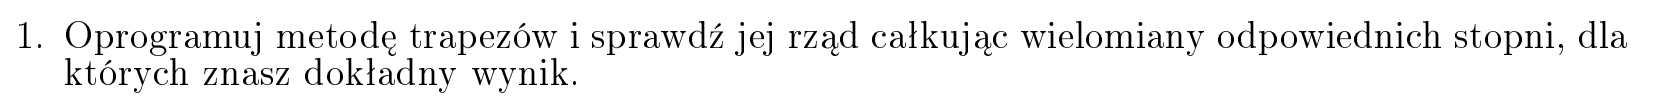

In [3]:
trapez_method(;a,b,f::Function)= (f(b)+f(a))*(b-a)/2

trapez_method (generic function with 1 method)

In [4]:
n=2
a=rand(n)*10

2-element Vector{Float64}:
 1.7746731952556838
 2.5939338600987027

In [5]:
n=2
a=rand(n)*10
trapez_method(a=0,b=2,f=x->pol(a,x)) - sum(a[i]/i * 2^(i) for i in 1:n)

0.0

In [6]:
n=3
a=rand(n)*10
trapez_method(a=0,b=2,f=x->pol(a,x)) - sum(a[i]/i * 2^(i) for i in 1:n)

1.7739209762726489

Metoda trapezów jest metodą Newtona-Corteza dla $N=1$ zatem całkuje wielomiany rzędu $2\left[\frac{N}{2}\right] + 2 = 2$

# 2

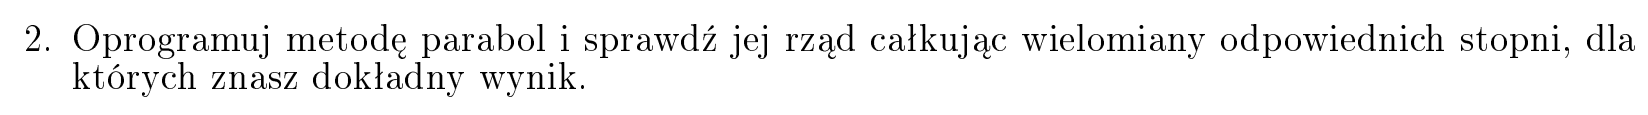

In [7]:
simpson_method(;a,b,f::Function)= ( f(a) + 4*f((b+a)/2) + f(b) )*(b-a)/6 # Błąd! na wykłądzie jest /3 a nie /6

simpson_method (generic function with 1 method)

In [11]:
n=3
a=rand(n)*10
simpson_method(a=0,b=1,f=x->pol(a,x)) - sum(a[i]/i for i in 1:n)

0.0

In [12]:
n=4
a=rand(n)*10
simpson_method(a=0,b=1,f=x->pol(a,x)) - sum(a[i]/i for i in 1:n)

0.0

In [13]:
n=5
a=rand(n)*10
simpson_method(a=0,b=1,f=x->pol(a,x)) - sum(a[i]/i for i in 1:n)

0.018875215689999614

Metoda trapezów jest metodą Newtona-Corteza dla $N=2$ zatem całkuje wielomiany rzędu $2\left[\frac{N}{2}\right] + 2 = 4$

# 3

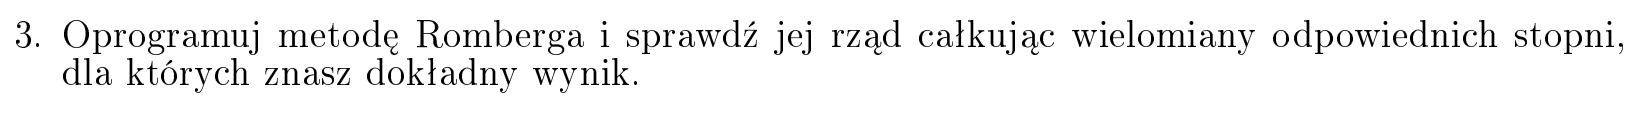

In [16]:
Romberg_method(;a,b,f::Function,m, i)=begin
    h=(b-a) * 2. ^-i
    if m==0
        return h*(sum(f.(a:h:(b+h/2))) - (f(b)+f(a))/2)
    end

    Tₘ₋₁ᵢ  = Romberg_method(a=a,b=b,f=f, m=m-1, i=i)
    Tₘ₋₁ᵢ₊₁= Romberg_method(a=a,b=b,f=f, m=m-1, i=i+1)
    return Tₘ₋₁ᵢ₊₁+(Tₘ₋₁ᵢ₊₁-Tₘ₋₁ᵢ)/(2^(2m)-1)
end

Romberg_method (generic function with 1 method)

In [15]:
Romberg_method(;a,b,f::Function,m, i)=begin
    h=2. ^-i
    if m==0
        return h*(sum(f.(a:h:(b+h/2))) - (f(b)+f(a))/2)
    end

    Tₘ₋₁ᵢ  = Romberg_method(a=a,b=b,f=f, m=m-1, i=i)
    Tₘ₋₁ᵢ₊₁= Romberg_method(a=a,b=b,f=f, m=m-1, i=i+1)
    return Tₘ₋₁ᵢ₊₁+(Tₘ₋₁ᵢ₊₁-Tₘ₋₁ᵢ)/(2^(2m)-1)
end

Romberg_method (generic function with 1 method)

In [17]:
n=5
a=rand(n)*10
Romberg_method(a=0,b=1,f=x->pol(a,x), m=2, i=0) - sum(a[i]/i for i in 1:n)

0.0

In [18]:
n=6
a=rand(n)*10
Romberg_method(a=0,b=1,f=x->pol(a,x), m=2, i=0) - sum(a[i]/i for i in 1:n)

3.552713678800501e-15

In [19]:
n=7
a=rand(n)*10
Romberg_method(a=0,b=1,f=x->pol(a,x), m=2, i=0) - sum(a[i]/i for i in 1:n)

0.0009748632232486898

In [20]:
n=7
a=rand(n)*10
Romberg_method(a=0,b=1,f=x->pol(a,x), m=3, i=0) - sum(a[i]/i for i in 1:n)

-1.0658141036401503e-14

In [21]:
n=8
a=rand(n)*10
Romberg_method(a=0,b=1,f=x->pol(a,x), m=3, i=0) - sum(a[i]/i for i in 1:n)

1.7763568394002505e-15

In [22]:
n=9
a=rand(n)*10
Romberg_method(a=0,b=1,f=x->pol(a,x), m=3, i=0) - sum(a[i]/i for i in 1:n)

1.4041924295327135e-5

In [28]:
b=1
m=rand(1:6)
n=2(m+1)
a=(2rand(n) .-1)*50
Romberg_method(a=0,b=b,f=x->pol(a,x), m=m, i=0) - sum(a[i]/i*b^i for i in 1:n)

7.105427357601002e-15

In [36]:
b=1
m=rand(1:6)
n=2(m+1)+1
a=(2rand(n) .-1)*50
Romberg_method(a=0,b=b,f=x->pol(a,x), m=m, i=0) - sum(a[i]/i*b^i for i in 1:n)

1.7231189843869288e-6

# 4

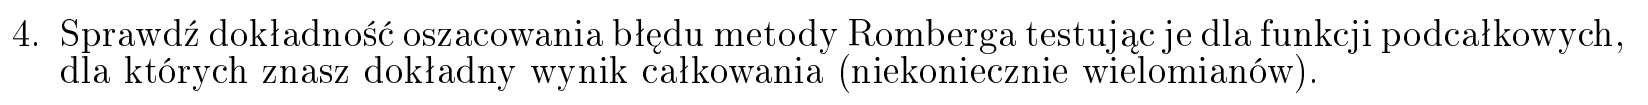

In [37]:
compound_method_romberg(;a,b,f,m,i,n)= sum(Romberg_method(a=aₙ, b=bₙ, m=m, i=i, f=f) for (aₙ, bₙ) in hcat(range(a,b,n+1)[1:end-1], range(a,b,n+1)[2:end]) |> eachrow)

compound_method_romberg (generic function with 1 method)

In [38]:
compound_method_trapez(;a,b,f,n)= sum(trapez_method(a=aₙ, b=bₙ, f=f) for (aₙ, bₙ) in hcat(range(a,b,n+1)[1:end-1], range(a,b,n+1)[2:end]) |> eachrow)

compound_method_trapez (generic function with 1 method)

In [39]:
[compound_method_trapez(a=0,b=1,f=sin,n=n)-1+ cos(1) for n in 1:20] .|> abs

20-element Vector{Float64}:
 0.03896220172791198
 0.00961717862778455
 0.004264363375247715
 0.002396756560358204
 0.001533348171416593
 0.0010646080046115003
 0.0007820648467807834
 0.0005987206401385503
 0.00047303735591253115
 0.0003831452738839447
 0.00031663982495555576
 0.00026605955363545597
 0.0002266977493087241
 0.00019546632177758205
 0.00017027101830247027
 0.00014965091964547206
 0.00013256176676490483
 0.00011824108612923379
 0.0001061216340900728
 9.577434361296433e-5

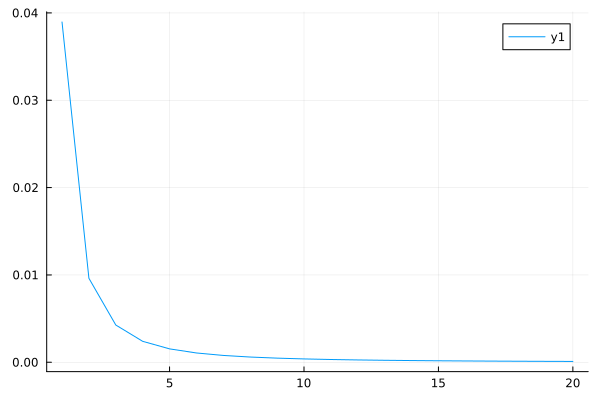

In [40]:
plot(ans)

┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\Kacper\.julia\packages\PlotUtils\wo8RM\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\Kacper\.julia\packages\PlotUtils\wo8RM\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\Kacper\.julia\packages\PlotUtils\wo8RM\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\Kacper\.julia\packages\PlotUtils\wo8RM\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\Kacper\.julia\packages\PlotUtils\wo8RM\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\Kacper\.julia\packages\PlotUtils\wo8RM\src\ticks.jl:194


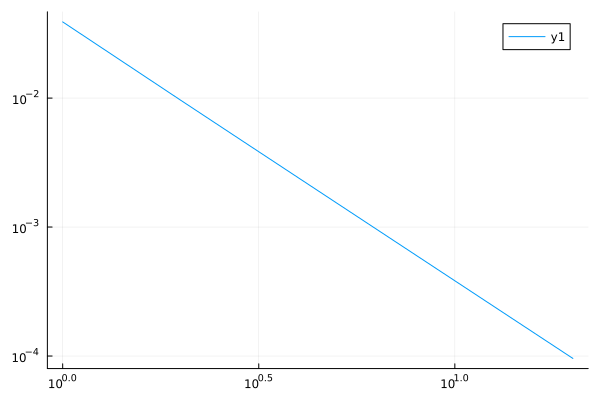

┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\Kacper\.julia\packages\PlotUtils\wo8RM\src\ticks.jl:194


In [41]:
plot!(scale=:log10)

Dla metody Romberga

In [42]:
H=0.15:0.05:1

0.15:0.05:1.0

In [43]:
m=0
tmp=[Romberg_method(a=0,b=h, f=cos, m=m,i=1) - sin(h) for h in H] .|> abs .|> log10

18-element Vector{Float64}:
 -4.154556569064277
 -3.780978023540931
 -3.4918414497041432
 -3.256248628966863
 -3.0577186642357668
 -2.886415141975656
 -2.7359946408840075
 -2.602127235699876
 -2.481725935910322
 -2.3725128425512243
 -2.272759568655628
 -2.1811241435272004
 -2.0965443340318264
 -2.018165478246322
 -1.9452902496936326
 -1.8773428174055187
 -1.8138427253219218
 -1.7543854972416444

In [44]:
coef(lm(hcat(ones(length(tmp)), H), tmp))[2], 2m+2

(2.569157997872971, 2)

In [45]:
m=1
tmp=[Romberg_method(a=0,b=h, f=cos, m=m,i=1) - sin(h) for h in H] .|> abs .|> log10
coef(lm(hcat(ones(length(tmp)), H), tmp))[2], 2m+2

(4.339435673365156, 4)

In [46]:
m=2
tmp=[Romberg_method(a=0,b=h, f=cos, m=m,i=1) - sin(h) for h in H] .|> abs .|> log10
coef(lm(hcat(ones(length(tmp)), H), tmp))[2], 2m+2

(6.107896048477689, 6)

In [47]:
m=3
tmp=[Romberg_method(a=0,b=h, f=cos, m=m,i=1) - sin(h) for h in H] .|> abs .|> log10
coef(lm(hcat(ones(length(tmp)), H), tmp))[2], 2m+2

(5.7429641367255915, 8)

In [48]:
m=4
tmp=[Romberg_method(a=0,b=h, f=cos, m=m,i=1) - sin(h) for h in H] .|> abs .|> log10
coef(lm(hcat(ones(length(tmp)), H), tmp))[2], 2m+2

(NaN, 10)

Dla m=3 i m=4 mamy już wyniki w granicach epsilona maszynowego (dla m=4 nawet 0)

In [49]:
m=3
[Romberg_method(a=0,b=h, f=cos, m=m,i=1) - sin(h) for h in H] .|> abs .|> log10

18-element Vector{Float64}:
 -16.556649761518965
 -16.556649761518965
 -16.556649761518965
 -15.954589770191003
 -15.954589770191003
 -15.556649761518965
 -15.255619765854984
 -14.793221767956029
 -14.46322807635673
 -14.128514967490178
 -13.814710683789766
 -13.532985843321173
 -13.26706080897637
 -13.021102482342299
 -12.789345444065692
 -12.572572727616135
 -12.368002465519249
 -12.174632718944098

# 5

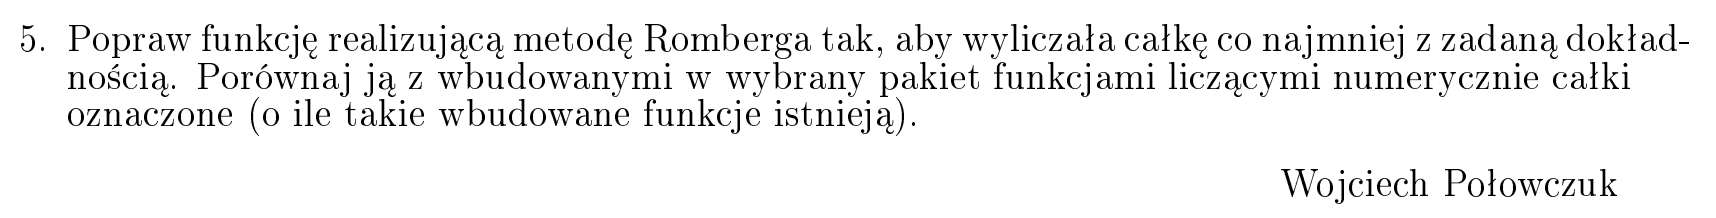

In [50]:
Compound_method_romberg_exact(;a,b,f,epsil)=begin
    i=2
    m=2
    p=2m+2
    C=maximum([(compound_method_romberg(a=a, b=b, f=f, m=m, i=i, n=2*k) -
            compound_method_romberg(a=a, b=b, f=f, m=m, i=i, n=k))/(BigFloat(2)^(-p) -1)*BigInt(k)^p for k in 1:15] .|> abs)
    #n: epsil > n C ((b-a)/n)ᵖ = C (b-a)ᵖ n⁻ᵖ⁺¹  ≈>  n > (C/epsil) ^ (1/(p-1)) * (b-a)^(p/(p-1))    || p/(p-1) = 6/5 

    n=round(Int, (C/epsil)^(1/(p-1)) * (b-a)^(p/(p-1)))+1
end

Compound_method_romberg_exact (generic function with 1 method)

In [51]:
Compound_method_romberg_exact(a=0,b=1,f=exp,epsil=1/10)

1

In [52]:
compound_method_romberg(a=0, b=1, f=exp, m=2, i=2, n=1) - exp(1) +1 

2.1631296753810147e-10

In [53]:
Compound_method_romberg_exact(a=0,b=10,f=exp,epsil=1/10)

32

In [54]:
compound_method_romberg(a=0, b=10, f=exp, m=2, i=2, n=32) - exp(10) +1 

2.586602931842208e-9

In [55]:
Compound_method_romberg_exact(a=0,b=10,f=exp,epsil=1e-6) #nope

309

In [56]:
Compound_method_romberg_exact(a=0,b=4,f=exp,epsil=1e-6)

11

In [57]:
compound_method_romberg(a=0, b=4, f=exp, m=2, i=2, n=11) - exp(4) +1 

1.5639045614079805e-11

In [76]:
epsil=rand()^5
n=Compound_method_romberg_exact(a=0,b=10,f=exp,epsil=epsil)
if n>50
    print("Nope")
else
    tmp=compound_method_romberg(a=0, b=10, f=exp, m=2, i=2, n=n) - exp(10) +1
    tmp, epsil, abs(tmp)<epsil
end

Nope

In [91]:
epsil=rand()^10
n=Compound_method_romberg_exact(a=0,b=5,f=exp,epsil=epsil)
if n>50
    print("Nope")
else
    tmp=compound_method_romberg(a=0, b=5, f=exp, m=2, i=2, n=n) - exp(5) +1
    tmp, epsil, abs(tmp)<epsil
end

(2.9041302695986815e-10, 8.14829420374025e-5, true)

# Śmieci?

In [130]:
compound_method_romberg(;a,b,f,m,i,n)= sum(Romberg_method(a=aₙ, b=bₙ, m=m, i=i, f=f) for (aₙ, bₙ) in hcat(range(a,b,n+1)[1:end-1], range(a,b,n+1)[2:end]) |> eachrow)

compound_method_romberg (generic function with 2 methods)

In [ ]:
N=3:50
M=1:8
tmp=[ π-compound_method_romberg(a=0,b=2π,f=x->sin(x)^2, m=m, i=10, n=n) for m in M, n in N]  .|> abs .|> log2

In [154]:
vcat([coef(lm(hcat(ones(length(tmp[i,:])), N), tmp[i,:]))' for i in 1:size(tmp)[1]]...)

8×2 Matrix{Float64}:
  -3.55607  0.0489123
  -4.73404  0.0593043
  -5.61448  0.0603636
  -6.97251  0.0694675
  -8.66178  0.0897836
  -8.74183  0.0622779
  -9.47806  0.0558542
 -10.5138   0.0457024

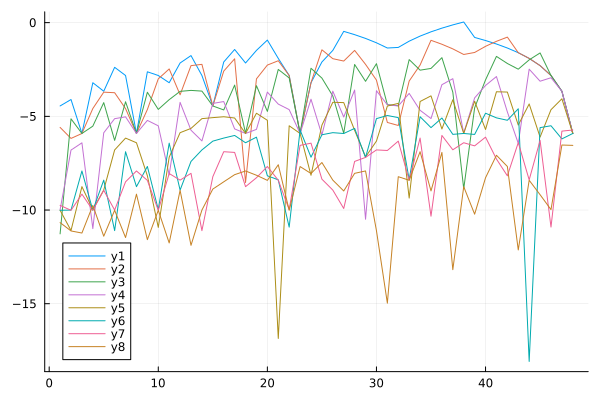

In [155]:
plot(tmp')